Coarsen a density grid and source file. 

In [2]:
import sys
print(sys.path)
import os

sys.path.insert(0, os.path.abspath('/home/iti20/software/pyC2Ray/pyc2ray-env/bin'))
sys.path.insert(0, os.path.abspath('/home/iti20/software/pyC2Ray/pyc2ray-env/lib/python3.12/site-packages/tools21cm-2.2.10-py3.12-linux-x86_64.egg'))


['/home/iti20/codes/pyC2Ray/docs/examples', '/home/iti20/software/tools21cm', '/home/iti20/software/pyC2Ray', '/home/iti20/c2raytools', '/home/iti20', '/home/iti20/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/opt/rocm-6.3.3/lib']


In [3]:
import pyc2ray as pc2r
import tools21cm as t2c
import numpy as np, matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

### Reading simulation data
Here we read the ionisation fraction data cube produced with the [pyC2Ray](https://github.com/cosmic-reionization/pyC2Ray) code. For the density field, we will consider the gridded density field created by an N-body code, [CubeP3M](https://github.com/jharno/cubep3m), which were used by pyC2Ray code as input.

In [4]:
path_to_datafiles = '/media/iti20/4store_toshiba/244Mpc_WMAP3+/coarser_data_SPH_4000_244Mpc/nc250/'
z = 7.059

In [5]:
t2c.set_sim_constants(244) # This line is only useful while working with C2Ray simulations.

d_file = t2c.DensityFile(path_to_datafiles+'7.059n_all.dat')

dens  = d_file.raw_density
print(np.shape(dens))

grid_size=dens.shape[0]
print(grid_size)

dens_avg = np.sum(dens)/grid_size**3
print(dens_avg)

(250, 250, 250)
250
32114.187698176


In [30]:
coarsening_fraction = 2  # by what factor do we want to coarsen the grid?
                       # make sure the original grid size is divisible by this factor
coarse_grid_size = grid_size//coarsening_fraction

print(coarse_grid_size)

125


In [120]:
if grid_size%coarsening_fraction!=0:
    print('this is not dividing evenly, fix it')

In [121]:
coarse_density=np.zeros((coarse_grid_size,coarse_grid_size,coarse_grid_size), dtype='float32')

In [122]:

print(dens[0:coarsening_fraction,0:coarsening_fraction,0:coarsening_fraction])
print(dens[0,0,0])
print(dens[1,0,0])
print(dens[0,1,0])

print(dens[0:coarsening_fraction,0:coarsening_fraction,0:coarsening_fraction].sum())

for i in range(coarse_grid_size):
    for j in range(coarse_grid_size):
        for k in range(coarse_grid_size):
            #print(dens[0:coarsening_fraction,0:coarsening_fraction,0:coarsening_fraction])
            #print(dens[0:coarsening_fraction,0:coarsening_fraction,0:coarsening_fraction].sum())
            #print(sum(dens[(i-1)*coarsening_fraction:i*coarsening_fraction,(j-1)*coarsening_fraction:j*coarsening_fraction,(k-1)*coarsening_fraction:k*coarsening_fraction]))
            coarse_density[i,j,k] = dens[i*coarsening_fraction:(i+1)*coarsening_fraction-1,j*coarsening_fraction:(j+1)*coarsening_fraction-1,k*coarsening_fraction:(k+1)*coarsening_fraction-1].sum()
            #print(coarse_density[0,0,0],coarse_density[1,0,0])

[[[18491.174 20042.887]
  [20084.93  16985.717]]

 [[23034.12  18571.363]
  [25534.66  28371.107]]]
18491.174
23034.12
20084.93
171115.97


In [123]:
import matplotlib.pyplot as plt


In [124]:
box_dims = 244/0.7 # Length of the volume along each direction in Mpc.

dx, dy = box_dims/dens.shape[1], box_dims/dens.shape[2]
y, x = np.mgrid[slice(dy/2,box_dims,dy),
                slice(dx/2,box_dims,dx)]

dx_coarse, dy_coarse = box_dims/coarse_density.shape[1], box_dims/coarse_density.shape[2]
y_coarse, x_coarse = np.mgrid[slice(dy_coarse/2,box_dims,dy_coarse),
                slice(dx_coarse/2,box_dims,dx_coarse)]

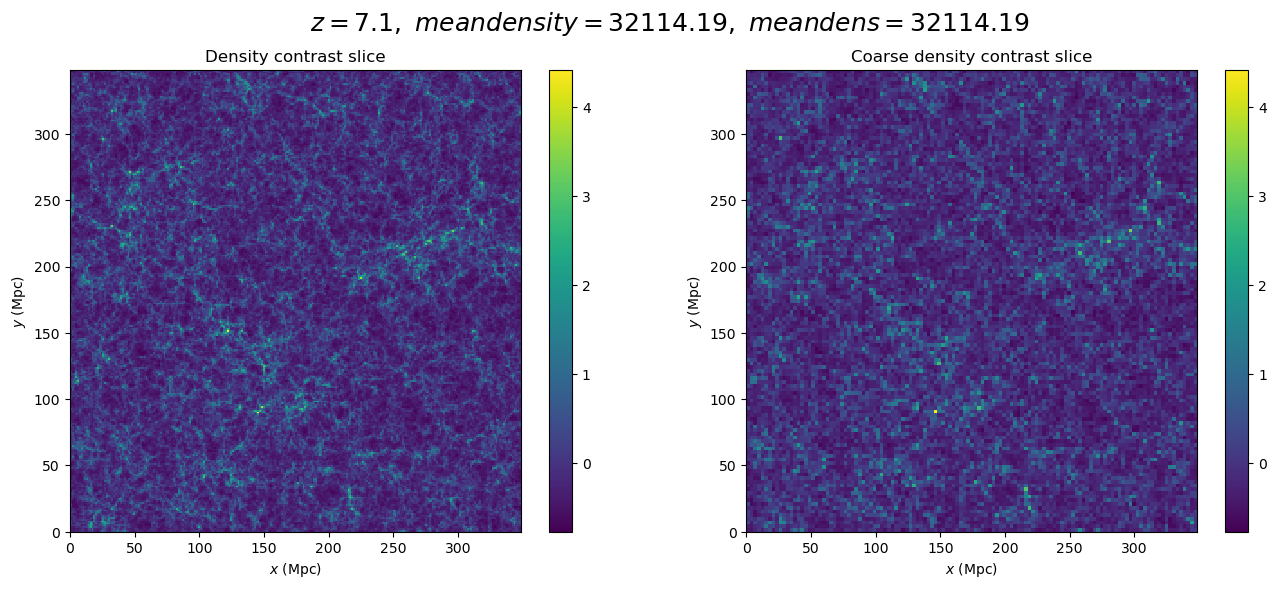

In [125]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.suptitle('$z={0:.1f},~mean density={1:.2f},~mean dens=${1:.2f}'.format(z,dens.mean(),coarse_density.mean()), size=18)

plt.subplot(121)
plt.title('Density contrast slice')
plt.pcolormesh(x, y, dens[0]/dens.mean()-1)
plt.xlabel('$x$ (Mpc)')
plt.ylabel('$y$ (Mpc)')
plt.colorbar()

plt.subplot(122)
plt.title('Coarse density contrast slice')
plt.pcolormesh(x_coarse, y_coarse, coarse_density[0]/coarse_density.mean()-1)
plt.xlabel('$x$ (Mpc)')
plt.ylabel('$y$ (Mpc)')
plt.colorbar()

In [126]:
#filename = (path_to_datafiles+'7.059ncoarse_all.dat')
filename = ('./'+'7.059ncoarse_all.dat')

In [127]:
print(filename)

./7.059ncoarse_all.dat


In [128]:
f = open(filename, 'wb')

mesh_x, mesh_y, mesh_z = coarse_density.shape[0],coarse_density.shape[1],coarse_density.shape[2]
mesh_coarse=np.array([mesh_x,mesh_y,mesh_z],dtype='int32')

print(mesh_coarse)

#swap 1st and 3rd axes to orient the array the same as before (why were they flupped??)
coarse_density_swapped=np.swapaxes(coarse_density, 0, 2)

mesh_coarse.tofile(f)
coarse_density_swapped.tofile(f)

f.close()


[125 125 125]


In [129]:
filename_coarse='./'+'7.059ncoarse_all.dat'

import os

notebook_path = os.getcwd()
print(notebook_path)

#print(old_format)

print(filename_coarse)
dcoarse_file = t2c.DensityFile(filename_coarse)

dens_coarse  = dcoarse_file.raw_density
print(np.shape(dens_coarse))


#f = open(filename_coarse, 'rb')

#temp_mesh = np.fromfile(f,count=3,dtype='int32')
#mesh_x, mesh_y, mesh_z = temp_mesh

#print(temp_mesh)

#dens_coarse = np.fromfile(f, dtype='float32')
#dens_coarse = dens_coarse.reshape((mesh_x, mesh_y, mesh_z), order='F')

#f.close()



grid_size_coarse=dens_coarse.shape[0]
print(grid_size_coarse)

dens_avg_coarse = np.sum(dens_coarse)/grid_size_coarse**3
print(dens_avg_coarse)

print(coarse_density[0,0,0],dens_coarse[0,0,0])
print(coarse_density[5,8,120],dens_coarse[5,8,120],dens_coarse[8,5,120],dens_coarse[5,120,8],dens_coarse[8,120,5],dens_coarse[120,5,8],dens_coarse[120,8,5])


/home/iti20/codes/pyC2Ray/docs/examples
./7.059ncoarse_all.dat
(125, 125, 125)
125
32118.639951872
18491.174 18491.174
22748.533 22748.533 64729.906 20824.312 12998.808 74980.664 19693.068


In [130]:
1953125**(1./3.)

124.99999999999997

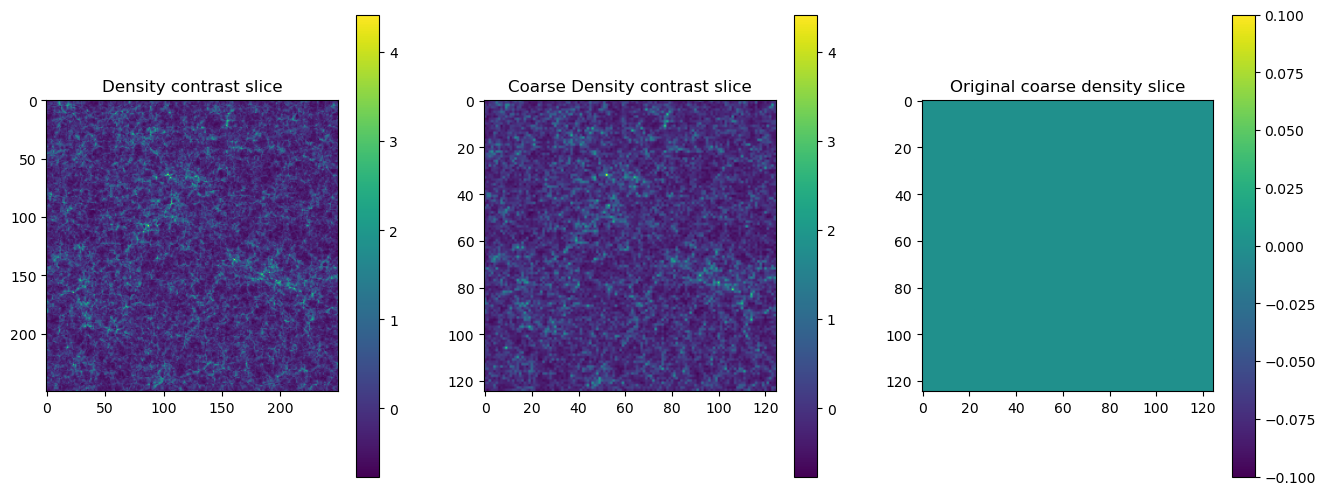

0.0


In [131]:
plt.subplot(131)
plt.title('Density contrast slice')
plt.imshow(dens[0,:,:]/dens.mean()-1)
plt.colorbar()

plt.subplot(132)
plt.title('Coarse Density contrast slice')
plt.imshow(dens_coarse[0,:,:]/dens_coarse.mean()-1)
plt.colorbar()

plt.subplot(133)
plt.title('Original coarse density slice')
plt.imshow((coarse_density[0,:,:]-dens_coarse[0,:,:])/coarse_density.mean())
plt.colorbar()

plt.show()

print(np.max(coarse_density-dens_coarse))

In [8]:
path_to_datafiles = '/media/iti20/4store_toshiba/244Mpc_WMAP3+/sources/'
z = 21.062

In [76]:
t2c.set_sim_constants(244) # This line is only useful while working with C2Ray simulations.

#s_file = t2c.SourceFile(path_to_datafiles+'21.062-coarsest_sources.dat')

file=path_to_datafiles+'21.062-coarsest_sources.dat'
# use original C2Ray source file
#src = t2c.SourceFile(filename=file, mass='hm')
src = np.loadtxt(file, skiprows=1)
srcpos = src[:,0:3]

In [77]:
print(srcpos)
print(src)

[[200. 200.  51.]
 [201. 162. 109.]
 [101. 200. 226.]]
[[200.     200.      51.     462.9742   0.    ]
 [201.     162.     109.     405.6362   0.    ]
 [101.     200.     226.     418.1901   0.    ]]


In [78]:
src_coarse==src
src_coarse[:,0:3]=src[:,0:3]//coarsening_fraction
#src_coarse[:,0]=src_coarse[0,0:3].astype('int32')


In [79]:
print(src_coarse)
print(src)

[[100.     100.      25.     462.9742   0.    ]
 [100.      81.      54.     405.6362   0.    ]
 [ 25.     100.     113.     418.1901   0.    ]]
[[200.     200.      51.     462.9742   0.    ]
 [201.     162.     109.     405.6362   0.    ]
 [101.     200.     226.     418.1901   0.    ]]


In [80]:
np.savetxt('test.txt',src_coarse)